Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries


In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#unzipping the dataset in the drive
!unzip "/content/gdrive/MyDrive/AIML2/CNN_assignment.zip" > /dev/null

replace Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [5]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
# defining the train and test dataset path
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [7]:
# checking the total count of train dataset and test dataset
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Create a dataset

In [8]:
batch_size = 32
img_height = 180
img_width = 180


### Load using keras.preprocessing

In [9]:
#getting all the images from subdirectories
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',seed=123
    )


Found 2239 files belonging to 9 classes.


In [10]:
# list of all the classes
image_dataset.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [11]:
class_names = image_dataset.class_names

In [12]:
data_dir_train

PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [13]:
files_path_dict = {}
for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

### Visualize the data


In [14]:
from tensorflow.keras.preprocessing.image import load_img

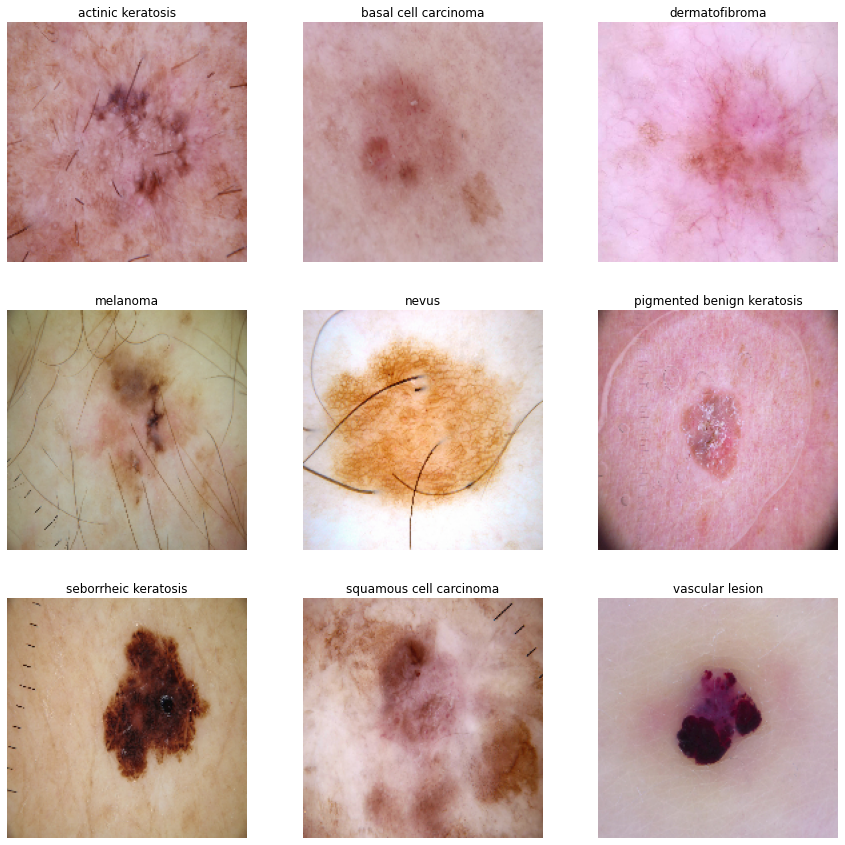

In [15]:
# visaulising the data set by displaying one picture from each class

plt.figure(figsize=(15,15))
index = 0

for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(img_height,img_width)))
    plt.title(c)
    plt.axis("off")

In [16]:
# removing the output folder from each class, this is done to avoid doubling of data on re-execution.
%rm -rf 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output'
%rm -rf 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output'
%rm -rf 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output'
%rm -rf 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output'
%rm -rf 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output'
%rm -rf 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output'
%rm -rf 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output'
%rm -rf 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output'
%rm -rf 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output'

In [17]:
# list of all the classes
%ls Skin\ cancer\ ISIC\ The\ International\ Skin\ Imaging\ Collaboration/Train

'actinic keratosis'/     'pigmented benign keratosis'/
'basal cell carcinoma'/  'seborrheic keratosis'/
 dermatofibroma/         'squamous cell carcinoma'/
 melanoma/               'vascular lesion'/
 nevus/


#### Creating train and validation dataset with 80-20 split.

In [18]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width), label_mode='categorical',
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [19]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width), label_mode='categorical',
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [20]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model Creation

In [21]:
# sequential model creation
model = Sequential()

In [22]:
# rescaling layer
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)))

In [23]:
# first convolution layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [24]:
# second convolution layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [25]:
# third convolution layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [26]:
# dropout layer 
model.add(layers.Dropout(0.5))

In [27]:
# flatten layer to convert the multi-diamentional input to single diamentional
model.add(layers.Flatten())

In [28]:
# dense layer with relu activation function
model.add(layers.Dense(128,activation='relu'))

In [29]:
# dropout layer
model.add(layers.Dropout(0.25))

In [30]:
# dense layer with softmax activation function
model.add(layers.Dense(len(class_names),activation='softmax'))

### Compile the model

In [31]:
# Adam optimizer is used and categorical_crossentropy is used as a loss function
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Train the model

In [33]:
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)


Epoch 1/20
56/56 [==============================] - 182s 3s/step - loss: 2.0169 - accuracy: 0.2299 - val_loss: 1.8443 - val_accuracy: 0.3177
Epoch 2/20
56/56 [==============================] - 157s 3s/step - loss: 1.7306 - accuracy: 0.3661 - val_loss: 1.8404 - val_accuracy: 0.3378
Epoch 3/20
56/56 [==============================] - 172s 3s/step - loss: 1.6827 - accuracy: 0.3828 - val_loss: 1.4913 - val_accuracy: 0.4877
Epoch 4/20
56/56 [==============================] - 158s 3s/step - loss: 1.5147 - accuracy: 0.4660 - val_loss: 1.4523 - val_accuracy: 0.5056
Epoch 5/20
56/56 [==============================] - 168s 3s/step - loss: 1.4007 - accuracy: 0.5117 - val_loss: 1.4820 - val_accuracy: 0.5011
Epoch 6/20
56/56 [==============================] - 157s 3s/step - loss: 1.3628 - accuracy: 0.5184 - val_loss: 1.3866 - val_accuracy: 0.5324
Epoch 7/20
56/56 [==============================] - 174s 3s/step - loss: 1.2754 - accuracy: 0.5513 - val_loss: 1.4157 - val_accuracy: 0.5123
Epoch 8/20
56

### Visualizing training results

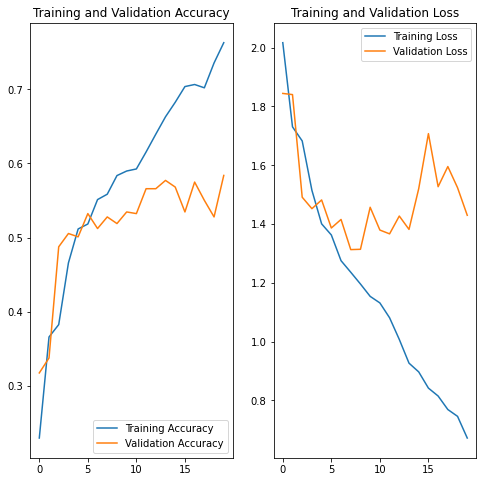

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings
##### The model is overfitting as the validation matrics and training matrics are not parallel.
##### The model starts to overfit from 4-5 epochs onwards.

##### - Which class has the least number of samples?
##### seborrheic keratosis
##### - Which classes dominate the data in terms proportionate number of samples?
##### pigmented benign keratosis

In [35]:
#install Augmentor
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F85C18AE160>: 100%|██████████| 500/500 [00:26<00:00, 18.60 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F85C1875490>: 100%|██████████| 500/500 [00:22<00:00, 22.04 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F85C189D8E0>: 100%|██████████| 500/500 [00:25<00:00, 19.47 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F85C1883070>: 100%|██████████| 500/500 [02:08<00:00,  3.89 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F85C1899D00>: 100%|██████████| 500/500 [01:58<00:00,  4.22 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F85C18402E0>: 100%|██████████| 500/500 [00:25<00:00, 19.77 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F85AE573F70>: 100%|██████████| 500/500 [00:57<00:00,  8.65 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F85AB72BEE0>: 100%|██████████| 500/500 [00:23<00:00, 21.48 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F85C1BAE970>: 100%|██████████| 500/500 [00:25<00:00, 19.99 Samples/s]


In [44]:
%ls Skin\ cancer\ ISIC\ The\ International\ Skin\ Imaging\ Collaboration/Train/actinic\ keratosis/output/ |wc -l

500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [45]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [46]:
%ls 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output' |wc

    500    1500   44000


In [50]:
os.path.join(data_dir_train, '*','output', '*.jpg')

'Skin cancer ISIC The International Skin Imaging Collaboration/Train/*/output/*.jpg'

In [55]:
%ls 'Skin cancer ISIC The International Skin Imaging Collaboration'/Train/*/output/*.jpg |wc -l

4500


In [61]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0025350.jpg_6fa8c3dc-834f-44ba-b534-e6b3b86c2ff9.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0029043.jpg_098174c2-84b2-4d10-ae31-f8ed5c69bad7.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0030991.jpg_28b65348-6325-4d2b-a23d-5b8bd94b893f.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0030387.jpg_ad24bb09-4313-44db-a0a9-1a207e959de9.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0033295.jpg_e6de5274-f10d-471a-8720-f3a47ab2bda2.jpg',
 'Skin cancer ISIC The Interna

In [62]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carc

In [63]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [66]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [48]:
batch_size = 32
img_height = 180
img_width = 180

In [67]:
data_dir_train

PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [75]:
%ls 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/' |wc -l

115


#### Creating train and validation dataset with 80-20 split.

In [80]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, seed=123, 
    validation_split = 0.2, 
    subset = 'training', 
    image_size=(img_height, img_width), 
    label_mode='categorical',
    batch_size=batch_size)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [81]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  label_mode='categorical',
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [82]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [83]:
# sequential model creation
model = Sequential()

In [84]:
# rescaling layer
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)))

In [85]:
# first convolution layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [86]:
# second convolution layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [87]:
# third convolution layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [88]:
# dropout layer 
model.add(layers.Dropout(0.5))

In [89]:
# flatten layer to convert the multi-diamentional input to single diamentional
model.add(layers.Flatten())

In [90]:
# dense layer with relu activation function
model.add(layers.Dense(128,activation='relu'))

In [91]:
# dropout layer
model.add(layers.Dropout(0.25))

In [92]:
# dense layer with softmax activation function
model.add(layers.Dense(len(class_names),activation='softmax'))

### Compile the model

In [93]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [94]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 128)      

### Train the model

In [95]:
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
169/169 [==============================] - 524s 3s/step - loss: 1.9474 - accuracy: 0.2550 - val_loss: 1.5406 - val_accuracy: 0.4068
Epoch 2/20
169/169 [==============================] - 475s 3s/step - loss: 1.5476 - accuracy: 0.4154 - val_loss: 1.4899 - val_accuracy: 0.4365
Epoch 3/20
169/169 [==============================] - 458s 3s/step - loss: 1.3811 - accuracy: 0.4815 - val_loss: 1.2641 - val_accuracy: 0.5174
Epoch 4/20
169/169 [==============================] - 461s 3s/step - loss: 1.2918 - accuracy: 0.5215 - val_loss: 1.2730 - val_accuracy: 0.5212
Epoch 5/20
169/169 [==============================] - 474s 3s/step - loss: 1.1776 - accuracy: 0.5599 - val_loss: 1.1584 - val_accuracy: 0.5672
Epoch 6/20
169/169 [==============================] - 462s 3s/step - loss: 1.0593 - accuracy: 0.6098 - val_loss: 1.1513 - val_accuracy: 0.5635
Epoch 7/20
169/169 [==============================] - 463s 3s/step - loss: 0.9878 - accuracy: 0.6217 - val_loss: 0.9350 - val_accuracy: 0.6585

### Visualising the model

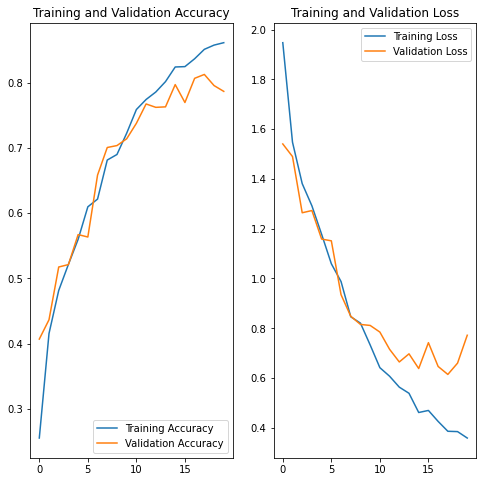

In [96]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings
##### there is a increse in accuracy with Augmentor library
##### The model shows some improvement compared to previous model, but the graph starts to distort around 15 epochs.